In [4]:
from sys import path
path.append('../3DAssignmentSolver')

from main import Solver
from gurobi_solver import GurobiSolver
from pulp_solver import PulpSolver
from utils import create_problems, benchmark, duality_visualizer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
N = 30
num_problems = 10

solver1 = Solver(max_iterations=50, threshold=0.05, verbosity = False)
solver2 = GurobiSolver('/Users/jetchung/gurobi.json')

solvers = [solver1, solver2]
problems = create_problems(N, num_problems, verbosity = True)

df = benchmark(problems, solvers, verbosity = True)



--------------------------------------------------
Created 10 problem instances for size 30 with scale=100.
Using a uniform distribution (beta = (1, 1)).
--------------------------------------------------


--------------------------------------------------
Benchmarking CustomSolver_1 Solver:
--------------------------------------------------
Instance 1: Objective Value: 2895.00, Duality % Gap: 2.83%
Instance 2: Objective Value: 2913.00, Duality % Gap: 2.11%
Instance 3: Objective Value: 2877.00, Duality % Gap: 3.45%
Instance 4: Objective Value: 2901.00, Duality % Gap: 2.60%
Instance 5: Objective Value: 2888.00, Duality % Gap: 3.13%
Instance 6: Objective Value: 2910.00, Duality % Gap: 2.24%
Instance 7: Objective Value: 2911.00, Duality % Gap: 2.25%
Instance 8: Objective Value: 2902.00, Duality % Gap: 2.49%
Instance 9: Objective Value: 2930.00, Duality % Gap: 1.67%
Instance 10: Objective Value: 2902.00, Duality % Gap: 2.48%
--------------------------------------------------
Avg. execut

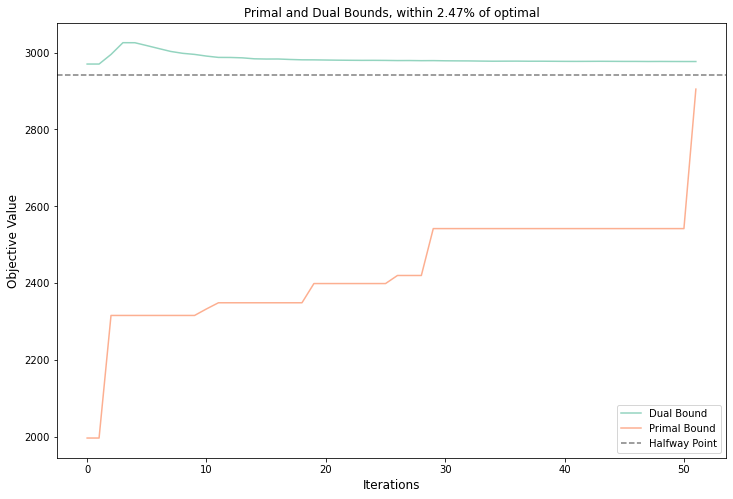

In [6]:
# visualizing how the primal dual method works
dual_bounds, primal_bounds, _, _ = solver1.optimize(problems[0])
duality_visualizer(dual_bounds, primal_bounds, (12, 8))

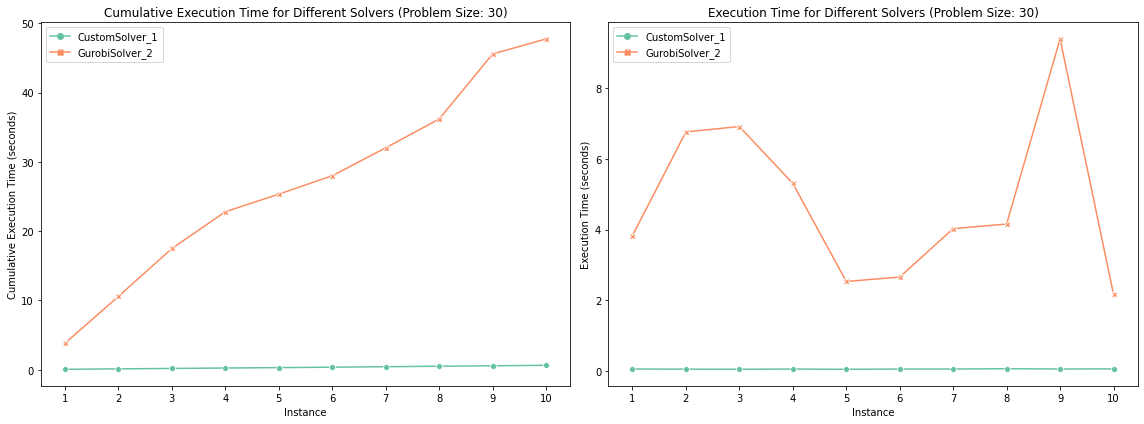

In [14]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first graph on the first subplot
sns.lineplot(data=df.cumsum(), dashes=False, markers=True, palette="Set2", ax=axes[0])
axes[0].set_xlabel("Instance")
axes[0].set_xticks(np.arange(1, num_problems + 1, 1))
axes[0].set_ylabel("Cumulative Execution Time (seconds)")
axes[0].set_title(f"Cumulative Execution Time for Different Solvers (Problem Size: {N})")
axes[0].legend()

# Plot the second graph on the second subplot
sns.lineplot(data=df, dashes=False, markers=True, palette="Set2", ax=axes[1])
axes[1].set_xlabel("Instance")
axes[1].set_xticks(np.arange(1, num_problems + 1, 1))
axes[1].set_ylabel("Execution Time (seconds)")
axes[1].set_title(f"Execution Time for Different Solvers (Problem Size: {N})")
axes[1].legend()

plt.tight_layout()
plt.show()


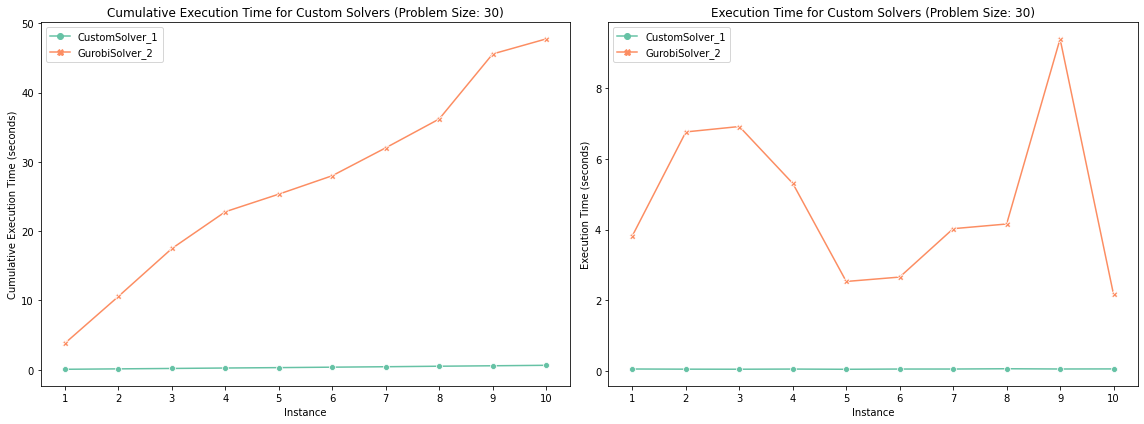

In [15]:
df_subset = df.iloc[:, :2] 

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first graph on the first subplot
sns.lineplot(data=df_subset.cumsum(), dashes=False, markers=True, palette="Set2", ax=axes[0])
axes[0].set_xlabel("Instance")
axes[0].set_xticks(np.arange(1, num_problems + 1, 1))
axes[0].set_ylabel("Cumulative Execution Time (seconds)")
axes[0].set_title(f"Cumulative Execution Time for Custom Solvers (Problem Size: {N})")
axes[0].legend()

# Plot the second graph on the second subplot
sns.lineplot(data=df_subset, dashes=False, markers=True, palette="Set2", ax=axes[1])
axes[1].set_xlabel("Instance")
axes[1].set_xticks(np.arange(1, num_problems + 1, 1))
axes[1].set_ylabel("Execution Time (seconds)")
axes[1].set_title(f"Execution Time for Custom Solvers (Problem Size: {N})")
axes[1].legend()

plt.tight_layout()
plt.show()


In [12]:
N = 60
num_problems = 5

solver1 = Solver(max_iterations=50, threshold=0.05, verbosity = False)


solvers = [solver1]
problems = create_problems(N, num_problems, verbosity = True)

df = benchmark(problems, solvers, verbosity = True)



--------------------------------------------------
Created 5 problem instances for size 60 with scale=100.
Using a uniform distribution (beta = (1, 1)).
--------------------------------------------------


--------------------------------------------------
Benchmarking CustomSolver_1 Solver:
--------------------------------------------------
Instance 1: Objective Value: 5822.00, Duality % Gap: 2.73%
Instance 2: Objective Value: 5843.00, Duality % Gap: 2.27%
Instance 3: Objective Value: 5830.00, Duality % Gap: 2.71%
Instance 4: Objective Value: 5827.00, Duality % Gap: 2.65%
Instance 5: Objective Value: 5809.00, Duality % Gap: 2.94%
--------------------------------------------------
Avg. execution time for CustomSolver_1: 0.5095 seconds
Percentage of time fraction < 5.00%: 100.00%
--------------------------------------------------


